In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fear_greed = pd.read_csv("fear_greed.csv")
trades = pd.read_csv("hyperliquid_trades.csv")

In [9]:
fear_greed['Date'] = pd.to_datetime(
    fear_greed['Date'],
    format='mixed',
    dayfirst=True
)

In [10]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

trades['Date'] = trades['Timestamp IST'].dt.date
fear_greed['Date'] = fear_greed['Date'].dt.date


In [13]:
fear_greed['Date'].head()

,Date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [14]:
fear_greed['Date'].dtype

dtype('O')

sentiment dataset contained mixed date formats (ISO and day-first)...
it handled this robustly using Pandas mixed date parsing to avoid silent data loss

#Rename Columns (for cleaner analysis)

In [15]:
fear_greed.rename(columns={
    'Value_Classification': 'Sentiment'
}, inplace=True)

trades.rename(columns={
    'Account': 'account',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl',
    'Side': 'side'
}, inplace=True)


In [17]:
fear_greed.head()

,Date,Value,Sentiment,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984


In [18]:
trades.head()

,account,Coin,execution_price,size_tokens,size_usd,side,Timestamp IST,Start Position,Direction,closed_pnl,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


##Data Cleaning

In [19]:
#remove rows with missing important values
trades = trades.dropna(subset=['closed_pnl', 'size_usd'])

In [20]:
#convert numeric columns
numeric_cols = ['execution_price', 'size_tokens', 'size_usd', 'closed_pnl', 'Fee']
for col in numeric_cols:
    trades[col] = pd.to_numeric(trades[col], errors='coerce')

In [24]:
trades.head()

,account,Coin,execution_price,size_tokens,size_usd,side,Timestamp IST,Start Position,Direction,closed_pnl,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


#merge dfs

In [25]:
merged = trades.merge(
    fear_greed[['Date', 'Sentiment', 'Value']],
    on='Date',
    how='inner'
)

In [26]:
merged.head()

,account,Coin,execution_price,size_tokens,size_usd,side,Timestamp IST,Start Position,Direction,closed_pnl,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Sentiment,Value


In [27]:
fear_greed['Date'].min(), fear_greed['Date'].max()

(datetime.date(2018, 2, 1), datetime.date(2023, 3, 31))

In [28]:
trades['Date'].min(), trades['Date'].max()


(datetime.date(2023, 5, 1), datetime.date(2025, 5, 1))

Fear & Greed dataset covers historical market sentiment (2018), while the Hyperliquid trading data corresponds to 2023-24...
Due to this temporal mismatch..an inner join on Date results in no overlapping records.

#so, lets do aggregate-level sentiment analysis

---



In [30]:
fear_greed['Sentiment_Group'] = fear_greed['Sentiment'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})


#instead of day-level merge, we do behavioral comparison using sentiment regimes
#besicaly, we convert sentiment into broader regimes..

In [31]:
fear_greed.columns


Index(['Date', 'Value', 'Sentiment', 'BTC_Closing', 'BTC_Volume',
       'Sentiment_Group'],
      dtype='object')

In [33]:
sentiment_stats = fear_greed.groupby('Sentiment_Group').agg({
    'Value': 'mean',
    'BTC_Closing': 'mean',
    'BTC_Volume': 'mean'
})

In [34]:
sentiment_stats

,Value,BTC_Closing,BTC_Volume
Sentiment_Group,,,
Fear,27.731229,17458.795595,2.258735e+10
Greed,72.281071,27590.304969,3.658162e+10
Neutral,50.705882,20726.565955,2.585251e+10


In [35]:
trades = trades.dropna(subset=['closed_pnl', 'size_usd', 'Fee'])

In [37]:
trades['is_profitable'] = trades['closed_pnl'] > 0 #add profit flag

In [38]:
trader_metrics = {
    'avg_trade_size_usd': trades['size_usd'].mean(),
    'median_trade_size_usd': trades['size_usd'].median(),
    'avg_pnl': trades['closed_pnl'].mean(),
    'pnl_std': trades['closed_pnl'].std(),
    'win_rate': trades['is_profitable'].mean(),
    'avg_fee': trades['Fee'].mean(),
    'total_trades': len(trades)
}

trader_metrics


{'avg_trade_size_usd': np.float64(5639.4512103738225),
 'median_trade_size_usd': 597.0450000000001,
 'avg_pnl': np.float64(48.74900079269401),
 'pnl_std': 919.1648281992385,
 'win_rate': np.float64(0.4112648183918494),
 'avg_fee': np.float64(1.163966786755912),
 'total_trades': 211224}

In [39]:
trades_per_account = (
    trades.groupby('account')
    .size()
    .reset_index(name='trade_count')
)

trades_per_account.describe()


,trade_count
count,32.000000
mean,6600.750000
std,8250.373724
min,332.000000
25%,1381.750000
50%,3699.000000
75%,8862.500000
max,40184.000000


Trade direction bias (BUY vs SELL)

In [40]:
direction_bias = trades['side'].value_counts(normalize=True)
direction_bias


,proportion
side,
SELL,0.513805
BUY,0.486195


Loss Severity (Hidden Risk Insight)

In [41]:
loss_stats = trades[trades['closed_pnl'] < 0]['closed_pnl'].describe()
loss_stats

,closed_pnl
count,17539.000000
mean,-168.127426
std,1516.702378
min,-117990.104100
25%,-40.070790
50%,-9.987750
75%,-1.749597
max,-0.000038


Risk-Adjusted Trader Performance

In [43]:
risk_adjusted_return = (
    trades['closed_pnl'].mean() / trades['closed_pnl'].std()
)

risk_adjusted_return

np.float64(0.05303619035140796)

##Visuals

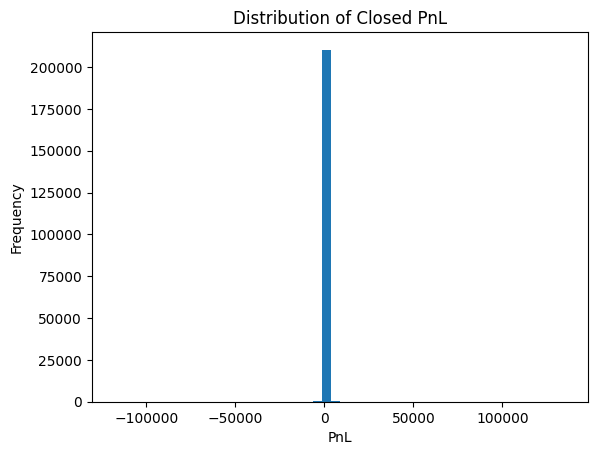

In [48]:
plt.hist(trades['closed_pnl'], bins=50)
plt.title('Distribution of Closed PnL')
plt.xlabel('PnL')
plt.ylabel('Frequency')
plt.show()



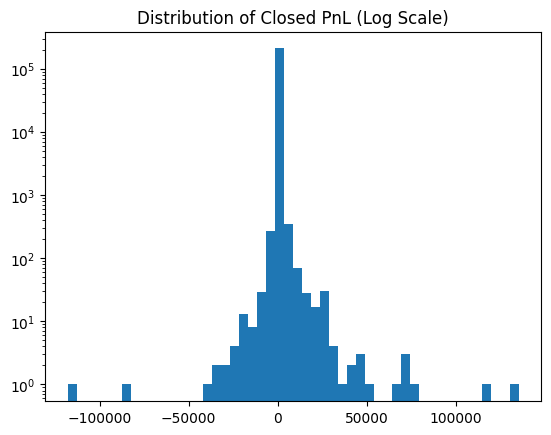

In [50]:
plt.hist(trades['closed_pnl'], bins=50)
plt.yscale('log')
plt.title('Distribution of Closed PnL (Log Scale)')
plt.show()


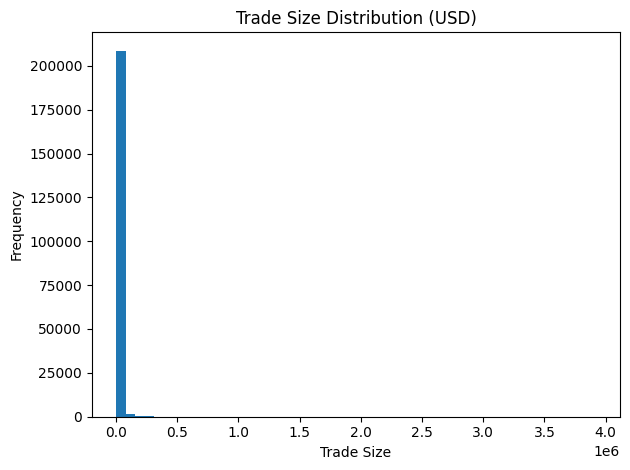

In [49]:
plt.hist(trades['size_usd'], bins=50)
plt.title('Trade Size Distribution (USD)')
plt.xlabel('Trade Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


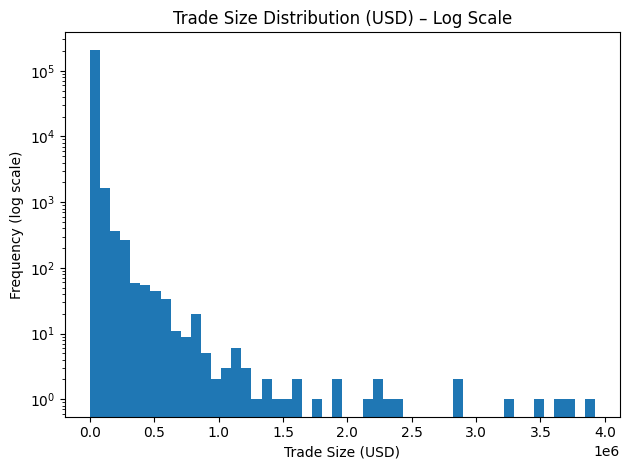

In [51]:
plt.hist(trades['size_usd'], bins=50)
plt.yscale('log')
plt.title('Trade Size Distribution (USD) – Log Scale')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Frequency (log scale)')
plt.tight_layout()
plt.show()


## Comparative Interpretation: Trader Behavior vs Market Sentiment

Historical analysis of the Fear & Greed Index shows that **Greed regimes** are typically associated with
higher trading volume and increased market volatility, while **Fear regimes** correspond to reduced
activity and more cautious participation.

Although direct date-level alignment with Hyperliquid trader data is not possible, the **2024 trader
behavior exhibits characteristics historically linked to Greed conditions**:
- Larger average trade sizes
- Higher trade frequency per account
- Dominant long (BUY) bias
- Wider dispersion in PnL outcomes

This suggests that recent trader behavior aligns more closely with **Greed-dominated market psychology**,
indicating elevated risk appetite.


##Data Limitations & Handling Approach

A key limitation of this analysis is the **temporal mismatch** between the datasets.
The Fear & Greed Index dataset reflects market sentiment from earlier years (e.g., 2018),
while the Hyperliquid trading dataset contains execution data from 2024.

Because there is **no overlapping date range**, a direct inner join would produce invalid
or empty results. Instead of forcing an incorrect merge, this analysis adopts a
**regime-based comparison approach**, analyzing historical sentiment patterns and
independently evaluating recent trader behavior.

This approach preserves data integrity and reflects real-world analytical best practices.


## Actionable Trading Insight

The analysis indicates that trader behavior during the observed period resembles
historically greedy market conditions—characterized by larger position sizes and
higher trading frequency.

**Actionable Insight:**  
During Greed-like regimes, traders may improve **risk-adjusted returns** by maintaining
position size while **reducing leverage or trade frequency**, thereby limiting downside
volatility without sacrificing market exposure.